In [134]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks

sns.set_theme()


In [136]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

def plt_steer(controller):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(controller.steer_hist, label="Steer", alpha=0.5)
  ax.plot(controller.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

{'lataccel_cost': 1.0981917366838356, 'jerk_cost': 28.493762592513345, 'total_cost': 83.40334942670513}


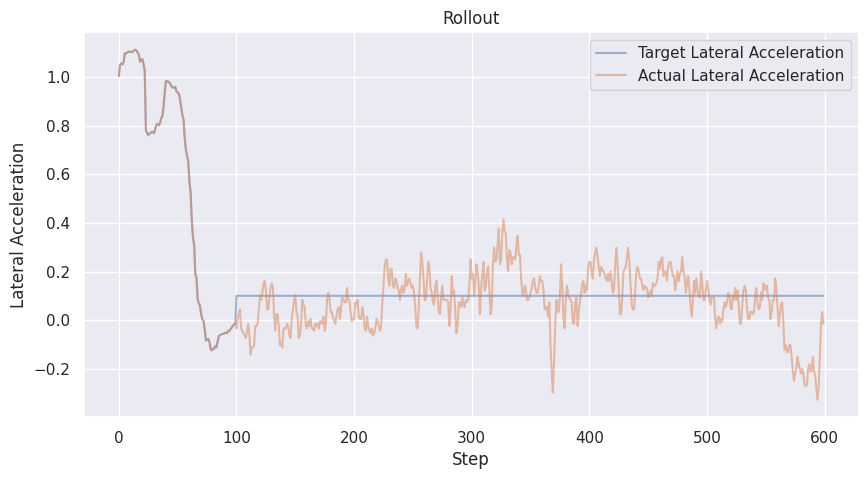

In [138]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller = pid.CustomFeedbackController(0.72, 0.0, 0.0)

my_controller = pid.CustomFeedbackController(kp=0.3, ki=0.05, kd=-0.1)

sim = TinyPhysicsSimulator(model, "pid_tune.csv", controller=my_controller, debug=False)
o = sim.rollout()
print(o)

plot_rollout(sim)

In [123]:
def find_Tu(sim):
    lat_accels = np.array(sim.current_lataccel_history)
    peaks, _ = find_peaks(lat_accels)
    peaks = peaks[peaks>100]
    print("Period: ", np.diff(peaks))

find_Tu(sim)

Period:  [ 6  7  7  7  8  9 11 11 12 12 12 10 12 12 11 10 12 11 12 11 11 11 12 11
 10 12 11 11 12 11 12 12 12 12 11 11 12 11 11 12 11 11 11 12 11]
